In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [0]:
## PRESENTATION LAYER

df_holdings = pd.read_csv("../DATA/GOLD/Holdings.csv", index_col=0, parse_dates=["date"])
df_invested = pd.read_csv("../DATA/GOLD/Invested.csv", index_col=0, parse_dates=["date"])
df_stockprice = pd.read_csv(
    "../DATA/GOLD/StockPrice.csv", index_col=0, parse_dates=["date"]
)

In [0]:
# multiply
df_investment = df_holdings.multiply(df_invested)
# Add the sum column
df_investment["investment"] = df_investment.sum(axis=1)

# multiply
df_stock_value = df_holdings.multiply(df_stockprice)
# Add the sum column
df_stock_value["stock_value"] = df_stock_value.sum(axis=1)

In [0]:
df = df_investment[["investment"]].join(df_stock_value[["stock_value"]])
df["pl"] = df["stock_value"]  / df["investment"] *100
df = df.round(2)
df = df[df["stock_value"] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 880 entries, 2020-04-21 to 2023-10-27
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   investment   880 non-null    float64
 1   stock_value  880 non-null    float64
 2   pl           880 non-null    float64
dtypes: float64(3)
memory usage: 27.5 KB


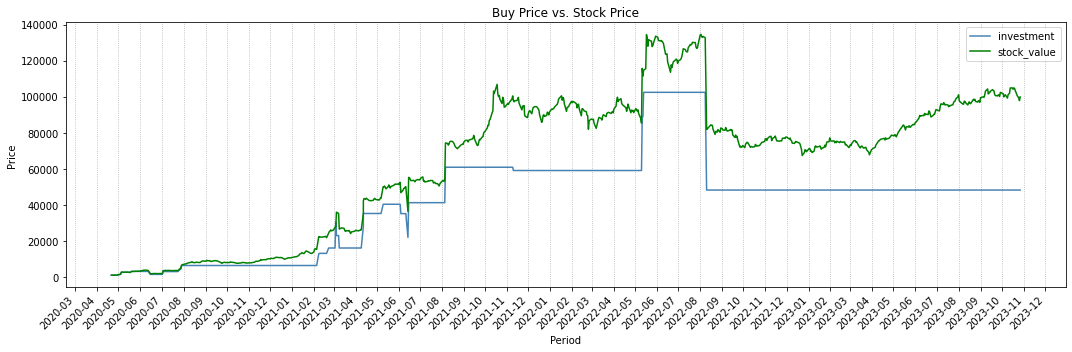

In [0]:
# plot the graph
fig, ax = plt.subplots(figsize=(15,5))

# plot individual lines
ax.plot(df.index, df["investment"], label="investment", color="steelblue")
ax.plot(df.index, df["stock_value"], label="stock_value", color="green")

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.grid(True, which='major', linestyle=':')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# add axis labels and a title
plt.ylabel("Price")
plt.xlabel("Period")
plt.title("Buy Price vs. Stock Price")
ax.legend()

plt.tight_layout()
plt.show()

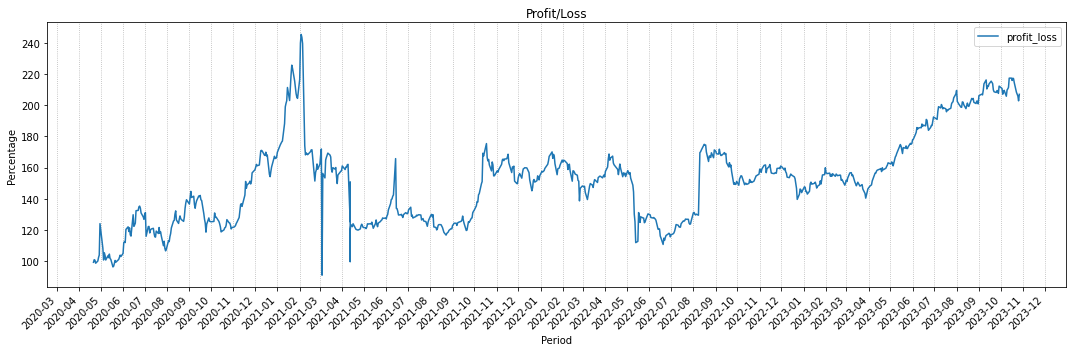

In [0]:
# plot the graph
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df["pl"], label='profit_loss')

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.grid(True, which='major', linestyle=':')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# add axis labels and a title
plt.ylabel("Percentage")
plt.xlabel("Period")
plt.title("Profit/Loss")
ax.legend()

plt.tight_layout()
plt.show()